Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 64)        0

Found 9999 images belonging to 2 classes.
Epoch 1/150
4/4 - 3s - loss: 0.7065 - acc: 0.5469 - 3s/epoch - 741ms/step
Epoch 2/150
4/4 - 2s - loss: 0.6948 - acc: 0.5625 - 2s/epoch - 525ms/step
Epoch 3/150
4/4 - 2s - loss: 0.6943 - acc: 0.4922 - 2s/epoch - 519ms/step
Epoch 4/150
4/4 - 2s - loss: 0.6939 - acc: 0.5078 - 2s/epoch - 515ms/step
Epoch 5/150
4/4 - 2s - loss: 0.6916 - acc: 0.4922 - 2s/epoch - 514ms/step
Epoch 6/150
4/4 - 2s - loss: 0.6938 - acc: 0.5391 - 2s/epoch - 514ms/step
Epoch 7/150
4/4 - 2s - loss: 0.6930 - acc: 0.4688 - 2s/epoch - 520ms/step
Epoch 8/150
4/4 - 2s - loss: 0.6967 - acc: 0.4453 - 2s/epoch - 524ms/step
Epoch 9/150
4/4 - 2s - loss: 0.6927 - acc: 0.4922 - 2s/epoch - 513ms/step
Epoch 10/150
4/4 - 2s - loss: 0.6909 - acc: 0.5156 - 2s/epoch - 526ms/step
Epoch 11/150
4/4 - 2s - loss: 0.6807 - acc: 0.6016 - 2s/epoch - 511ms/step
Epoch 12/150
4/4 - 2s - loss: 0.7017 - acc: 0.5156 - 2s/epoch - 520ms/step
Epoch 13/150
4/4 - 2s - loss: 0.6638 - acc: 0.5781 - 2s/epoch - 517

C:\Users\chand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


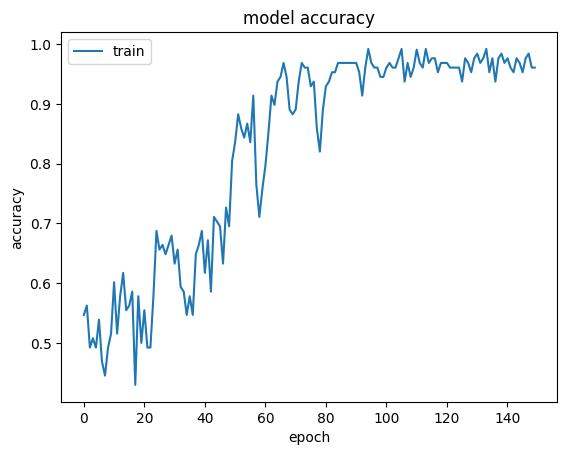

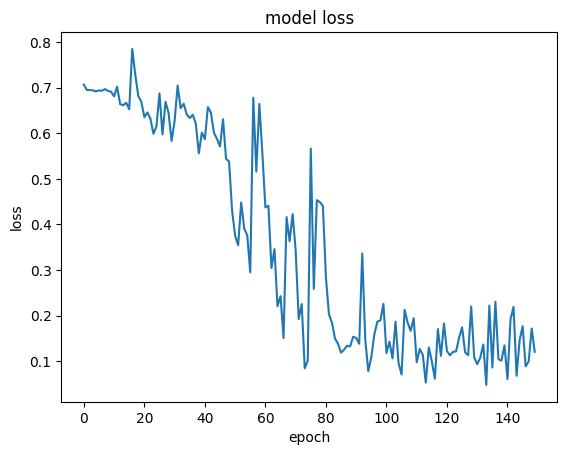

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

model.summary()

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.01)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['acc'])

bs=32         #Setting batch size
train_dir = r'train/'   #Setting training directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,
            class_mode='categorical',target_size=(180,180))

history = model.fit(train_generator,
                    steps_per_epoch=150 // bs,
                    epochs=150,
                    verbose=2)
#Saving the model
import h5py
model.save('malaria.h5')
#print(model.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [2]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
from ttkthemes import ThemedStyle

# Load the pre-trained model
model = tf.keras.models.load_model("malaria.h5")
loaded_image = None
thumbnail_image = None
alert_button = None

# Create a tkinter window
window = tk.Tk()
window.title("malaria")
window.geometry("800x600")

window_background_color = "light gray"
background_color = "light gray"  # Light Blue
accent_color = "gray"  # Red
positive_color = "#66BB6A"  # Green
negative_color = "#37474F"  # Dark Blue Gray
font_style = ("Helvetica", 16, "bold")
window.configure(bg=window_background_color)
# Create a themed style for tkinter widgets
style = ThemedStyle(window)
style.theme_use("arc")

# Function to classify an image
def classify_image():
    global alert_button
    if loaded_image is None:
        messagebox.showerror("Error", "No image loaded!")
        return

    try:
        img = loaded_image
        img = img.resize((180, 180))
        img = np.array(img) / 255.0  # Rescale the image
        img = img.reshape(1, 180, 180, 3)

        prediction = model.predict(img)
        if prediction[0][0] > 0.5:
            result_label.config(text="Predicted: Infected", fg=negative_color)
            # Add an alert button with a subtle animation
            alert_button = ttk.Button(frame2, text="Alert!", command=show_alert, width=20, style="Alert.TButton")
            alert_button.pack(pady=20)
            animate_alert_button(alert_button)
        else:
            result_label.config(text="Predicted: Uninfected", fg=positive_color)
            # Remove the alert button with a subtle animation
            if alert_button is not None:
                animate_clear_alert_button(alert_button)

    except Exception as e:
        messagebox.showerror("Error", f"Error processing the image: {str(e)}")

# Function to show an alert when H1N1 is detected
def show_alert():
    messagebox.showinfo("Alert", "maler detected! Seek medical attention.")

# Function to animate the alert button appearance
def animate_alert_button(button):
    button_state = button.state()
    button.state(["pressed"])
    window.update()
    window.after(100, button.state, button_state)
    window.update()

# Function to animate the clear alert button disappearance
def animate_clear_alert_button(button):
    button_state = button.state()
    button.state(["pressed"])
    window.update()
    window.after(100, button.destroy)
    window.update()

# Function to load an image
def load_image():
    global loaded_image, thumbnail_image
    file_path = filedialog.askopenfilename()
    if file_path:
        loaded_image = Image.open(file_path)

        # Display the loaded image as a thumbnail
        thumbnail = loaded_image.resize((200, 200))
        global thumbnail_image
        thumbnail_image = ImageTk.PhotoImage(thumbnail)
        thumbnail_label.config(image=thumbnail_image)
        thumbnail_label.image = thumbnail_image

# Function to clear the loaded image and go to the first part
def clear_image():
    global loaded_image, thumbnail_image, alert_button
    loaded_image = None
    thumbnail_label.config(image=None)
    result_label.config(text="")
    frame2.pack_forget()
    frame1.pack()
    # Remove the alert button with a subtle animation
    if alert_button is not None:
        animate_clear_alert_button(alert_button)

# Header and footer frames
header_frame = tk.Frame(window, bg=accent_color, pady=20)  # Increased pady for a larger header
footer_frame = tk.Frame(window, bg=accent_color, pady=20)  # Increased pady for a larger footer

# Pack header and footer frames
header_frame.pack(fill=tk.X)
footer_frame.pack(side=tk.BOTTOM, fill=tk.X)

# Header content
header_label = tk.Label(header_frame, text="MALARIA VIRUS DETECTION", font=("Helvetica", 24, "bold"), bg=accent_color, fg="#ffffff")
header_label.pack()

# Load Button
load_button = ttk.Button(header_frame, text="Load Image", command=lambda: [load_image(), frame1.pack_forget(), frame2.pack()], style="Accent.TButton")
load_button.pack(pady=20)

# Create the first part
frame1 = tk.Frame(window, bg=background_color, padx=20, pady=20)

# ... (existing code)

# Create the second part
frame2 = tk.Frame(window, bg=background_color, padx=20, pady=20)

# Thumbnail Display
thumbnail_label = tk.Label(frame2, bg=background_color, relief=tk.RAISED)
thumbnail_label.pack(pady=20)

# Buttons Frame
buttons_frame = tk.Frame(frame2, bg=background_color)
buttons_frame.pack(pady=20)

find_button = ttk.Button(buttons_frame, text="DETECT VIRUS", command=classify_image, style="Accent.TButton")
find_button.grid(row=0, column=0, padx=10)

clear_button = ttk.Button(buttons_frame, text="Clear Image", command=clear_image, style="Alert.TButton")
clear_button.grid(row=0, column=1, padx=10)

# Result Label
result_label = tk.Label(frame2, text="", font=("Arial", 30, "bold"), bg=background_color, fg="#333333")
result_label.pack(pady=30)

# Run the GUI
frame1.pack()
window.mainloop()


1/1 [==============================] - 0s 117ms/step
